# Exploring Data From the Web

### Introduction

Ok, so in the last lesson, we learned how to move through a list of dictionaries, selecting just the information that we wanted from each dictionary and adding it to our list. 

```python
populations = []

for each_city in cities:
    city_pop = each_city['2018estimate']
    populations.append(city_pop)
```

In this lesson, let's focus in on how we gathered that data.

## Introducing Pandas

Ok, time to get some data.  We wanted to gather data about a list of US cities.  That data is located [here](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population).

<img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/cities-chart.png" width="80%">

To collect this data, we'll use a library called pandas.  We don't need to install it, as it is pre-installed in our coding environment.  We can tell Python, that we would like to use pandas in our Jupyter notebook with the following line of code.

In [1]:
import pandas

> Press shift + enter on the cell above.

Oftentimes, we don't like to type the full word `pandas`, so the standard practice is that instead loading our library with the line `import pandas`, we instead use:

In [29]:
import pandas as pd

This is setting the `pandas` library to the variable `pd`.  So now we can get use different pandas methods with `pd.method_name()`.

### Gathering Data

The method that we want to use is in charge of gathering data from a webpage.  That method looks like the following: `pd.read_html`.

So to tell pandas to go to our Wikipedia page, and read the data, we do so with the following:

In [15]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
tables = pd.read_html(url)

So the above code just says to read the html at the specified URL.  What's the URL?  It's the web address at the top of any webpage.  

<img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/us-cities-url.png" width="70%">

> For example, at the very top, it says, `en.wikipedia.org/wiki/List_of_United_states_cities_by_population`.  

If you want pandas to look for the tables on that webpage, just copy and paste it.

> * On a mac, press `command + c` to copy and `command + v` to paste.
> * On a windows, press `control + c` to copy and `control + v` to paste.

So our code just reads the tables at the specified url.

In [16]:
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
tables = pd.read_html(url)

> Press shift + return.

Now `tables` is just a list of all of the tables that were gathered from that webpage.

And we can move one by one through each table simply by using our index accessor.

In [17]:
tables[0]

,0
0,Map all coordinates using: OpenStreetMap
1,Download coordinates as: KML · GPX


So we just selected the first table on the webpage.  Unfortunately, it's not what we want.  Let's move to the table at index `4`, which is the table we want.

In [6]:
tables[4][0:2]

,2018rank,City,State[c],2018estimate,2010Census,Change,2016 land area,2016 land area.1,2016 population density,2016 population density.1,Location
0,1,New York[d],New York,8398748,8175133,+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
1,2,Los Angeles,California,3990456,3792621,+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W


That's a bingo!

Because that the table we want, let's store it in a variable called `cities_table`.

In [8]:
cities_table = tables[4]

> Press shift + enter on the cell above.

### Converting to Python

Now right now, we have is that our table in something that is neither a list nor a dictionary.  But something called a dataframe.

In [30]:
cities_table[:2]

,2018rank,City,State[c],2018estimate,2010Census,Change,2016 land area,2016 land area.1,2016 population density,2016 population density.1,Location
0,1,New York[d],New York,8398748,8175133,+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
1,2,Los Angeles,California,3990456,3792621,+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W


And unfortunately we don't know anything about dataframes.  But that's ok, we can convert it into a *list of dictionaries* and then just work with our list of dictionaries.  We do so with the following.

In [9]:
cities = cities_table.to_dict('records')

cities[0:2]

[{'2018rank': 1,
  'City': 'New York[d]',
  'State[c]': 'New York',
  '2018estimate': 8398748,
  '2010Census': 8175133,
  'Change': '+2.74%',
  '2016 land area': '301.5\xa0sq\xa0mi',
  '2016 land area.1': '780.9\xa0km2',
  '2016 population density': '28,317/sq\xa0mi',
  '2016 population density.1': '10,933/km2',
  'Location': '40°39′49″N 73°56′19″W\ufeff / \ufeff40.6635°N 73.9387°W'},
 {'2018rank': 2,
  'City': 'Los Angeles',
  'State[c]': 'California',
  '2018estimate': 3990456,
  '2010Census': 3792621,
  'Change': '+5.22%',
  '2016 land area': '468.7\xa0sq\xa0mi',
  '2016 land area.1': '1,213.9\xa0km2',
  '2016 population density': '8,484/sq\xa0mi',
  '2016 population density.1': '3,276/km2',
  'Location': '34°01′10″N 118°24′39″W\ufeff / \ufeff34.0194°N 118.4108°W'}]

### Practicing with data from the web

Ok, so we gathered our data from Wikipedia with the following code.

In [31]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
tables = pd.read_html(url)

# retrieve correct table
cities_table = tables[4]

# convert dataframe to list of dictionaries
cities = cities_table.to_dict('records')

cities[:2]

[{'2018rank': 1,
  'City': 'New York[d]',
  'State[c]': 'New York',
  '2018estimate': 8398748,
  '2010Census': 8175133,
  'Change': '+2.74%',
  '2016 land area': '301.5\xa0sq\xa0mi',
  '2016 land area.1': '780.9\xa0km2',
  '2016 population density': '28,317/sq\xa0mi',
  '2016 population density.1': '10,933/km2',
  'Location': '40°39′49″N 73°56′19″W\ufeff / \ufeff40.6635°N 73.9387°W'},
 {'2018rank': 2,
  'City': 'Los Angeles',
  'State[c]': 'California',
  '2018estimate': 3990456,
  '2010Census': 3792621,
  'Change': '+5.22%',
  '2016 land area': '468.7\xa0sq\xa0mi',
  '2016 land area.1': '1,213.9\xa0km2',
  '2016 population density': '8,484/sq\xa0mi',
  '2016 population density.1': '3,276/km2',
  'Location': '34°01′10″N 118°24′39″W\ufeff / \ufeff34.0194°N 118.4108°W'}]

> Press `shift + enter` on the line above

And from there, we've already done the rest.  We go through each dictionary in our list and select only the data we want, and add it to a list. 

In [33]:
populations = []

for each_city in cities:
    city_pop = each_city['2018estimate']
    populations.append(city_pop)
    
city_names = []

for each_city in cities:
    city_name = each_city['City']
    populations.append(city_name)

Then we plot our data.

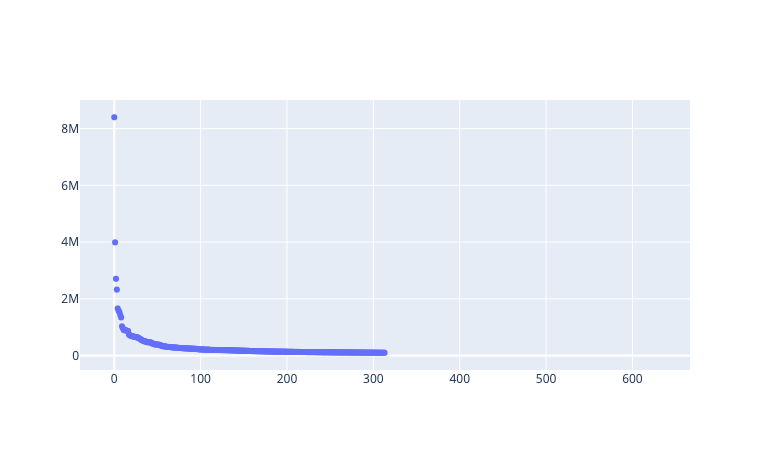

In [36]:
import plotly.graph_objects as go

scatter = go.Scatter(y = populations, hovertext = city_names, mode = 'markers')
go.Figure(scatter)

### Summary

In this lesson, we saw how to gather some live data from the web.  We did this in just a few lines:

In [52]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
tables = pd.read_html(url)
cities_table = tables[4]
cities = cities_table.to_dict('records')

The lines above gathered a list of tables from the specified URL.  Then once we gathered our `tables`, we selected the large table of cities and populations and stored it as our `cities_table`.  Then because this cities table is a `pandas dataframe` -- whatever that is -- we converted it to a list of dictionaries, with the line `cities_table.to_dict('records')` and stored this list of dictionaries as `cities`.  

Then we ended with the code that we had before.

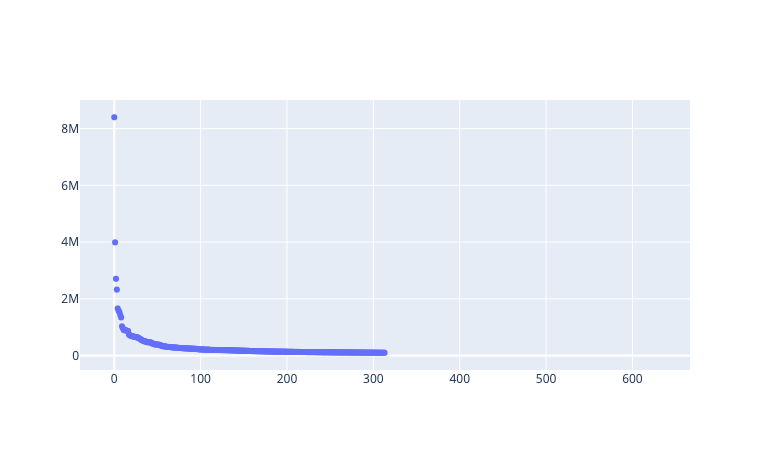

In [37]:
populations = []

for each_city in cities:
    city_pop = each_city['2018estimate']
    populations.append(city_pop)
    
city_names = []

for each_city in cities:
    city_name = each_city['City']
    populations.append(city_name)
    
import plotly.graph_objects as go

scatter = go.Scatter(y = populations, hovertext = city_names, mode = 'markers')
go.Figure(scatter)

<center>
<a href="https://www.jigsawlabs.io" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>

<right> 
<img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/pngfuel.com.png" align="right" style="padding-right: 20px" width="10%">
</right>